## **AIR QUALITY INDEX**

# Life Cycle of ML Project


*   Understanding the Problem Statement
*   Data Collection
*   Data Checks to perform
*   Exploratory Data Analysis
*   Data Pre-Processing
*   Model Training
*   Choose Best Model



# 1) Problem Statement

*   The goal of this project is to build a predictive model that can asses air quality based on various environmental factors, predict air quality to generate timely alerts, create guidelines and regulations to control pollution.

# 2) Data Collection

* Data Source - https://aqicn.org/data-platform/covid19/
* The data consists of 9 columns and 1048576 rows

# 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset

In [3]:
#df = pd.read_csv('data/aqi.csv')
df = pd.read_csv("/content/aqi.csv")

In [4]:
with open('/content/aqi.csv', 'r') as file:
    for i in range(10):
        print(file.readline())


Date,Country,City,Specie,count,min,max,median,variance

10-01-2024,KZ,Nur-Sultan,wind-speed,24,6,14.5,10.2,51.31

24-01-2024,KZ,Nur-Sultan,wind-speed,24,1,4.6,2,8.47

16-03-2024,KZ,Nur-Sultan,wind-speed,24,6,10.8,8.2,24.64

24-03-2024,KZ,Nur-Sultan,wind-speed,24,1,7.7,3.2,59.95

17-05-2024,KZ,Nur-Sultan,wind-speed,24,2,4.1,3,4.03

04-07-2024,KZ,Nur-Sultan,wind-speed,22,1,7.7,3.6,35.41

14-07-2024,KZ,Nur-Sultan,wind-speed,24,2.5,5.6,4.1,7.67

19-01-2024,KZ,Nur-Sultan,wind-speed,23,0.2,4.1,1.5,13.27

30-01-2024,KZ,Nur-Sultan,wind-speed,24,0.2,2.5,1.5,3.96



In [ ]:
df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,10-01-2024,KZ,Nur-Sultan,wind-speed,24,6.0,14.5,10.2,51.31
1,24-01-2024,KZ,Nur-Sultan,wind-speed,24,1.0,4.6,2.0,8.47
2,16-03-2024,KZ,Nur-Sultan,wind-speed,24,6.0,10.8,8.2,24.64
3,24-03-2024,KZ,Nur-Sultan,wind-speed,24,1.0,7.7,3.2,59.95
4,17-05-2024,KZ,Nur-Sultan,wind-speed,24,2.0,4.1,3.0,4.03


In [5]:
df.tail()

,Date,Country,City,Specie,count,min,max,median,variance
1048566,15-05-2024,JP,Akita,pm25,46,17.0,59.0,38.0,1162.36
1048567,04-02-2024,JP,Akita,pm25,44,9.0,34.0,17.0,209.06
1048568,27-02-2024,JP,Akita,pm25,45,5.0,38.0,17.0,752.65
1048569,28-02-2024,JP,Akita,pm25,44,13.0,53.0,30.0,606.57
1048570,17-03-2024,JP,Akita,pm25,48,17.0,76.0,42.0,2236.58


In [ ]:
df.shape

(1048571, 9)

# 2.2 Dataset Information



*   Date: The date of the measurement
*   Country: The country code
*   City: The city name
*   Specie: The type of measurement
*   count: The number of observations taken.
*   min: The minimum value recorded.
*   max: The maximum value recorded.
*   median: The median value of the observations.
*   variance: The variance of the observations.



# 3.1 Checking Missing values

In [ ]:
df.isna().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

No missing values in the dataset

# 3.2 Checking Duplicates

In [ ]:
df.duplicated().sum()

0

No duplicates in the dataset

# 3.3 Checking Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Date      1048571 non-null  object 
 1   Country   1048571 non-null  object 
 2   City      1048571 non-null  object 
 3   Specie    1048571 non-null  object 
 4   count     1048571 non-null  int64  
 5   min       1048571 non-null  float64
 6   max       1048571 non-null  float64
 7   median    1048571 non-null  float64
 8   variance  1048571 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 72.0+ MB


# 3.4 Checking the number of unique values of each columns

In [ ]:
df.nunique()

Date           207
Country         83
City           528
Specie          19
count         1585
min           4686
max           5596
median        4276
variance    255549
dtype: int64

# 3.5 Checking statistics

In [ ]:
df.describe()

,count,min,max,median,variance
count,1.048571e+06,1.048571e+06,1.048571e+06,1.048571e+06,1.048571e+06
mean,1.112343e+02,1.108618e+02,1.384712e+02,1.217028e+02,2.685148e+03
std,1.485999e+02,2.963185e+02,2.987317e+02,2.961511e+02,5.194643e+04
min,2.000000e+00,-3.273900e+03,-3.600000e+01,-3.900000e+01,0.000000e+00
25%,3.600000e+01,1.000000e+00,9.900000e+00,4.100000e+00,1.830000e+01
50%,7.100000e+01,6.000000e+00,2.640000e+01,1.410000e+01,9.955000e+01
75%,1.380000e+02,2.500000e+01,8.330000e+01,4.900000e+01,6.654800e+02
max,2.232000e+03,1.100000e+03,3.275100e+03,1.100000e+03,2.307340e+07


Insights


*   The mean values for count, min, max, and median suggest average levels of air quality parameters.
*   High standard deviations in the min, max, and variance columns indicate significant fluctuations in air quality.
*   The presence of extreme values in min and max suggests potential outliers or data entry errors. Identifying and addressing these outliers is essential for accurate model training and prediction.



# 3.6 Exploring Data

In [ ]:
print("Categories in 'Country' variable:", end=" ")
print(df['Country'].unique())

print("Categories in 'City' variable:", end=" ")
print(df['City'].unique())

print("Categories in 'Specie' variable:", end=" ")
print(df['Specie'].unique())

print("Unique values in 'Date' variable:", end=" ")
print(df['Date'].nunique())

print("Unique values in 'Country' variable:", end=" ")
print(df['Country'].nunique())

print("Unique values in 'City' variable:", end=" ")
print(df['City'].nunique())

print("Unique values in 'Specie' variable:", end=" ")
print(df['Specie'].nunique())

print("Unique values in 'count' variable:", end=" ")
print(df['count'].nunique())

print("Unique values in 'min' variable:", end=" ")
print(df['min'].nunique())

print("Unique values in 'max' variable:", end=" ")
print(df['max'].nunique())

print("Unique values in 'median' variable:", end=" ")
print(df['median'].nunique())

print("Unique values in 'variance' variable:", end=" ")
print(df['variance'].nunique())


Categories in 'Country' variable: ['KZ' 'LK' 'MN' 'NL' 'SG' 'US' 'AR' 'ID' 'EE' 'IQ' 'KG' 'TH' 'BA' 'CW'
 'MK' 'MX' 'PL' 'SE' 'TJ' 'DK' 'IE' 'IL' 'MO' 'MY' 'CH' 'ET' 'BH' 'CL'
 'DZ' 'GE' 'GR' 'NZ' 'BD' 'BE' 'UG' 'KW' 'RO' 'ES' 'IS' 'PH' 'PR' 'SV'
 'UZ' 'BR' 'HR' 'IR' 'KR' 'PT' 'TM' 'CO' 'CA' 'SK' 'CZ' 'FR' 'GT' 'LA'
 'LT' 'NO' 'AU' 'CY' 'PK' 'TR' 'VN' 'XK' 'JO' 'IN' 'RS' 'RU' 'HK' 'NP'
 'CN' 'DE' 'GH' 'RE' 'TW' 'AE' 'EC' 'CI' 'GB' 'IT' 'AT' 'HU' 'JP']
Categories in 'City' variable: ['Nur-Sultan' 'Almaty' 'Colombo' 'Ulan Bator' 'Utrecht' 'Nijmegen'
 'Haarlem' 'Eindhoven' 'Rotterdam' 'Amsterdam' 'Dordrecht' 'Breda'
 'Groningen' 'Maastricht' 'The Hague' 'Singapore' 'Oklahoma City'
 'Raleigh' 'Memphis' 'Jackson' 'Boston' 'Richmond' 'Portland' 'Boise'
 'Austin' 'Honolulu' 'Fresno' 'Milwaukee' 'Hartford' 'Washington D.C.'
 'Chicago' 'Houston' 'Indianapolis' 'Atlanta' 'Charlotte' 'Sacramento'
 'Oakland' 'Providence' 'Staten Island' 'Brooklyn' 'Springfield'
 'The Bronx' 'San Jose' 'Los Angeles

In [6]:
# Define numerical & categorical columns correctly
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Print columns
print('We have {} numerical features: {}'.format(len(num_features), num_features))
print('\nWe have {} categorical features: {}'.format(len(cat_features), cat_features))


We have 5 numerical features: ['count', 'min', 'max', 'median', 'variance']

We have 4 categorical features: ['Date', 'Country', 'City', 'Specie']


# 3.7 Adding columns for Range of Values and Standard Deviation

In [7]:
df['range'] = df['max'] - df['min']
df['std_dev'] = df['variance'] ** 0.5
print(df.head())

         Date Country        City      Specie  count  min   max  median  \
0  10-01-2024      KZ  Nur-Sultan  wind-speed     24  6.0  14.5    10.2   
1  24-01-2024      KZ  Nur-Sultan  wind-speed     24  1.0   4.6     2.0   
2  16-03-2024      KZ  Nur-Sultan  wind-speed     24  6.0  10.8     8.2   
3  24-03-2024      KZ  Nur-Sultan  wind-speed     24  1.0   7.7     3.2   
4  17-05-2024      KZ  Nur-Sultan  wind-speed     24  2.0   4.1     3.0   

   variance  range   std_dev  
0     51.31    8.5  7.163100  
1      8.47    3.6  2.910326  
2     24.64    4.8  4.963869  
3     59.95    6.7  7.742739  
4      4.03    2.1  2.007486  


# 4) Exploring Data (Visualization)

# 4.1 Visualizing Range of values to make some conclusion


*   Histogram
*   Kernel Distribution Function



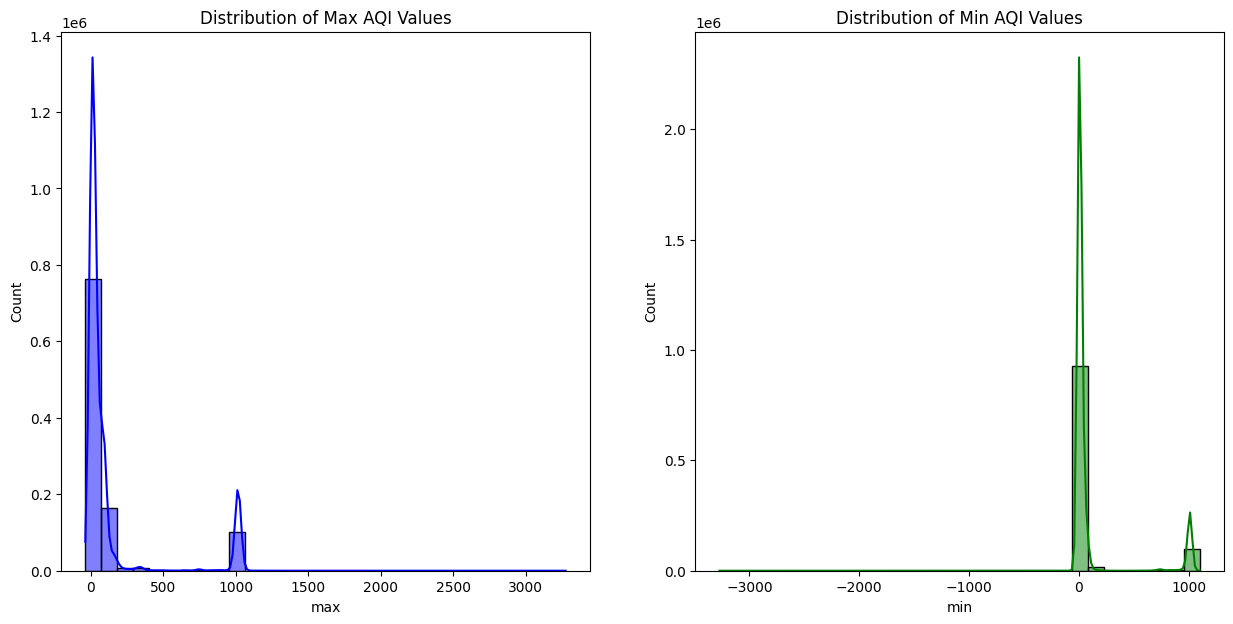

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(df['max'], kde=True, bins=30, color='blue')
plt.title('Distribution of Max AQI Values')
plt.subplot(122)
sns.histplot(df['min'], kde=True, bins=30, color='green')
plt.title('Distribution of Min AQI Values')
plt.show()

**Insights**
* The majority of the recorded Max AQI values are below 200.
* Min AQI values clustered around 0 indicating periods of relatively good air quality.

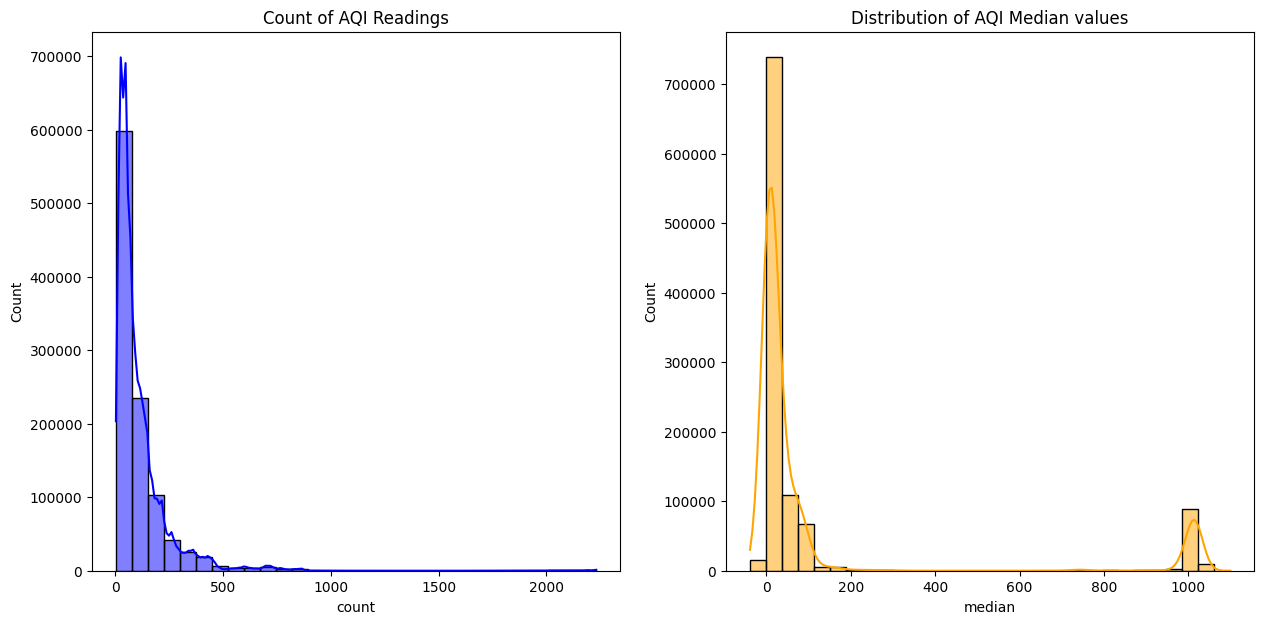

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(df['count'], kde=True, bins=30, color='blue')
plt.title('Count of AQI Readings')
plt.subplot(122)
sns.histplot(df['median'], kde=True, bins=30, color='orange')
plt.title('Distribution of AQI Median values')
plt.show()

*   The distribution of the count of AQI readings shows a high frequency of lower counts
*   The distribution of the median AQI values also shows that most values are concentrated below 100.

# 4.2 Multivariate Analysis using PiePlot

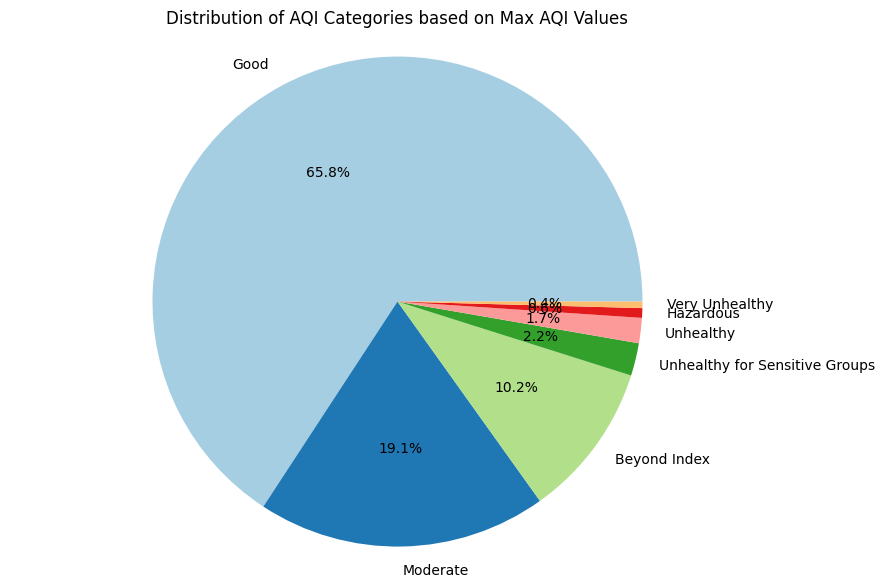

In [ ]:
import matplotlib.pyplot as plt

# Categorize the 'max' AQI values into different ranges
conditions = [
    (df['max'] <= 50),
    (df['max'] > 50) & (df['max'] <= 100),
    (df['max'] > 100) & (df['max'] <= 150),
    (df['max'] > 150) & (df['max'] <= 200),
    (df['max'] > 200) & (df['max'] <= 300),
    (df['max'] > 300) & (df['max'] <= 500),
    (df['max'] > 500)
]

categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Beyond Index']

df['AQI Category'] = pd.cut(df['max'], bins=[-float('inf'), 50, 100, 150, 200, 300, 500, float('inf')], labels=categories)

category_counts = df['AQI Category'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of AQI Categories based on Max AQI Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


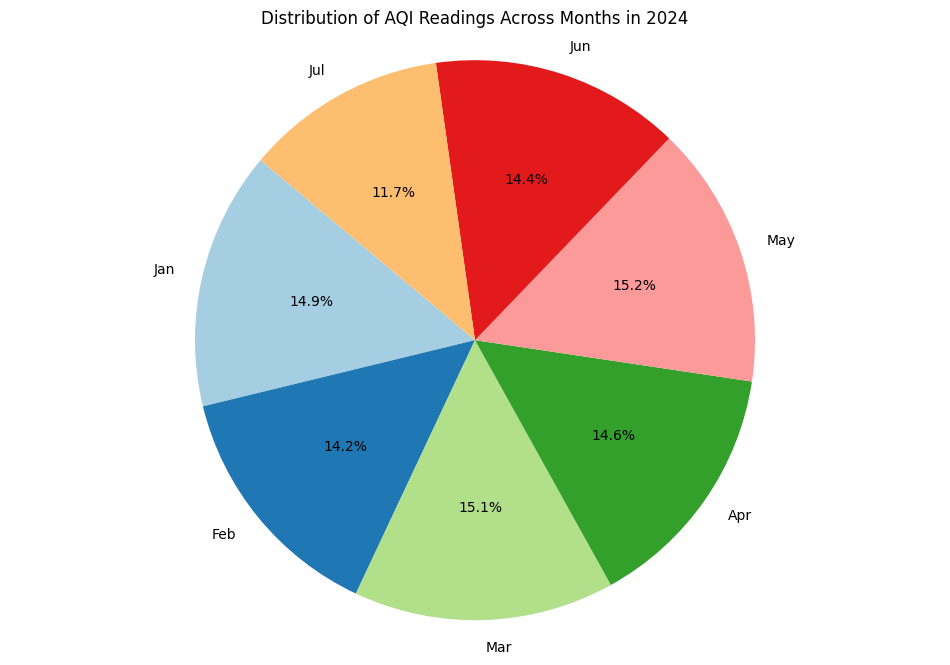

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Count occurrences of readings for each month
month_counts = df['Month'].value_counts().sort_index()

# Define month names for better readability
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts.index = month_counts.index.map(lambda x: month_names[x-1])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of AQI Readings Across Months in 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 4.4 Feature wise Visualization

# 4.4.1 Country Column


1.   Univariate Analysis
2.   Bivariate Analysis



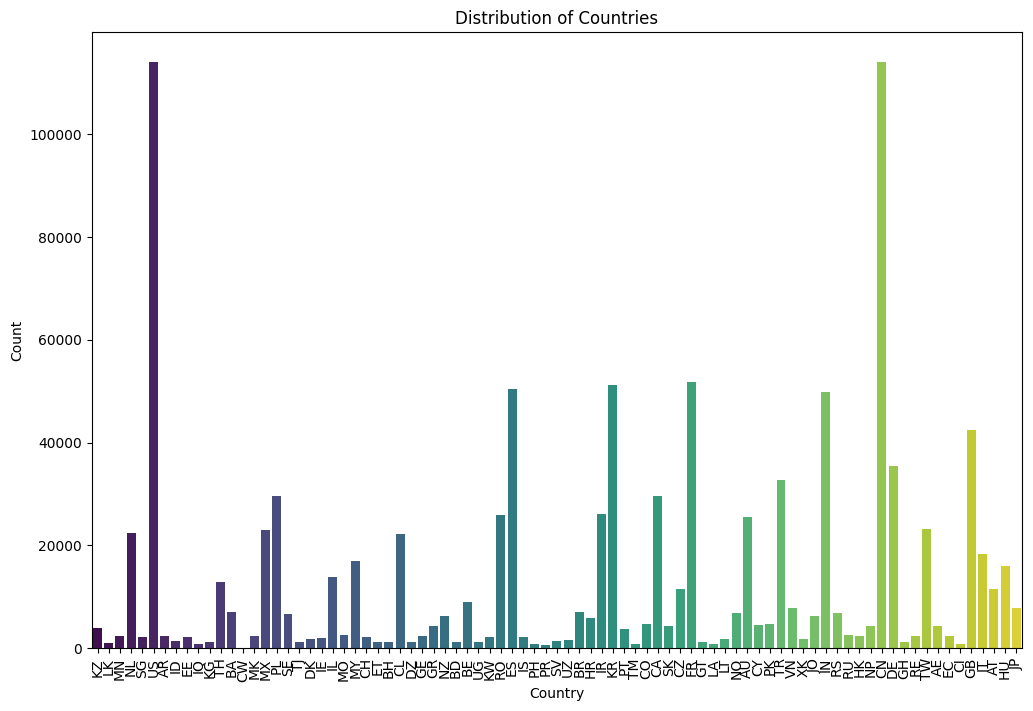

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis: Distribution of countries
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Country', palette='viridis')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


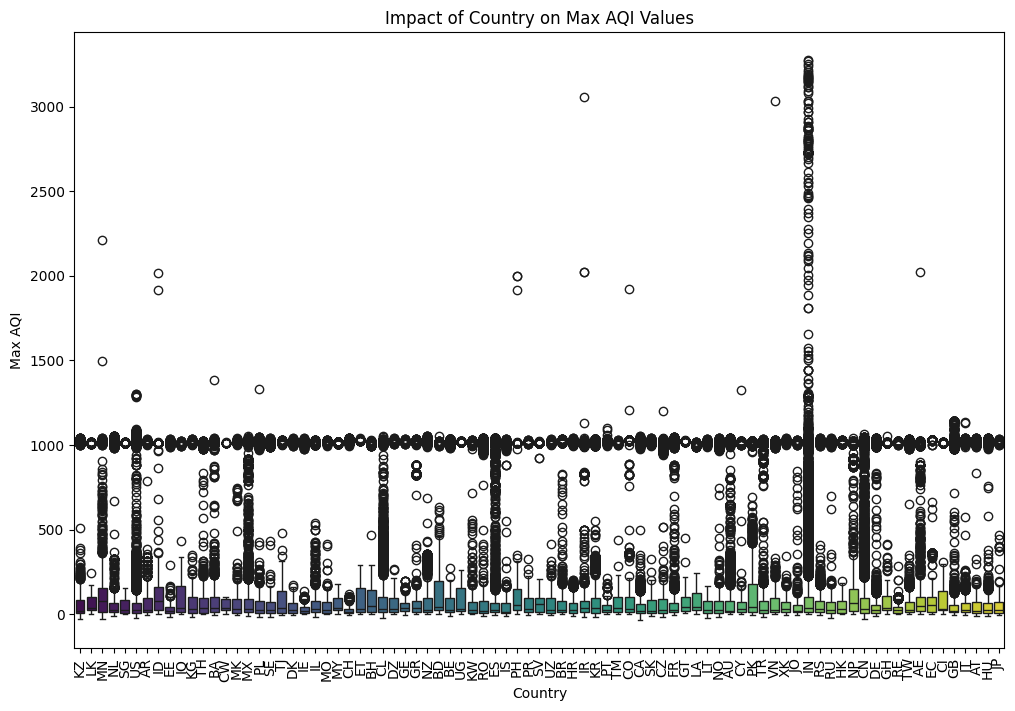

In [9]:
# Bivariate Analysis: Impact of country on AQI values
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Country', y='max', palette='viridis')
plt.title('Impact of Country on Max AQI Values')
plt.xlabel('Country')
plt.ylabel('Max AQI')
plt.xticks(rotation=90)
plt.show()


# 4.4.2 City Column

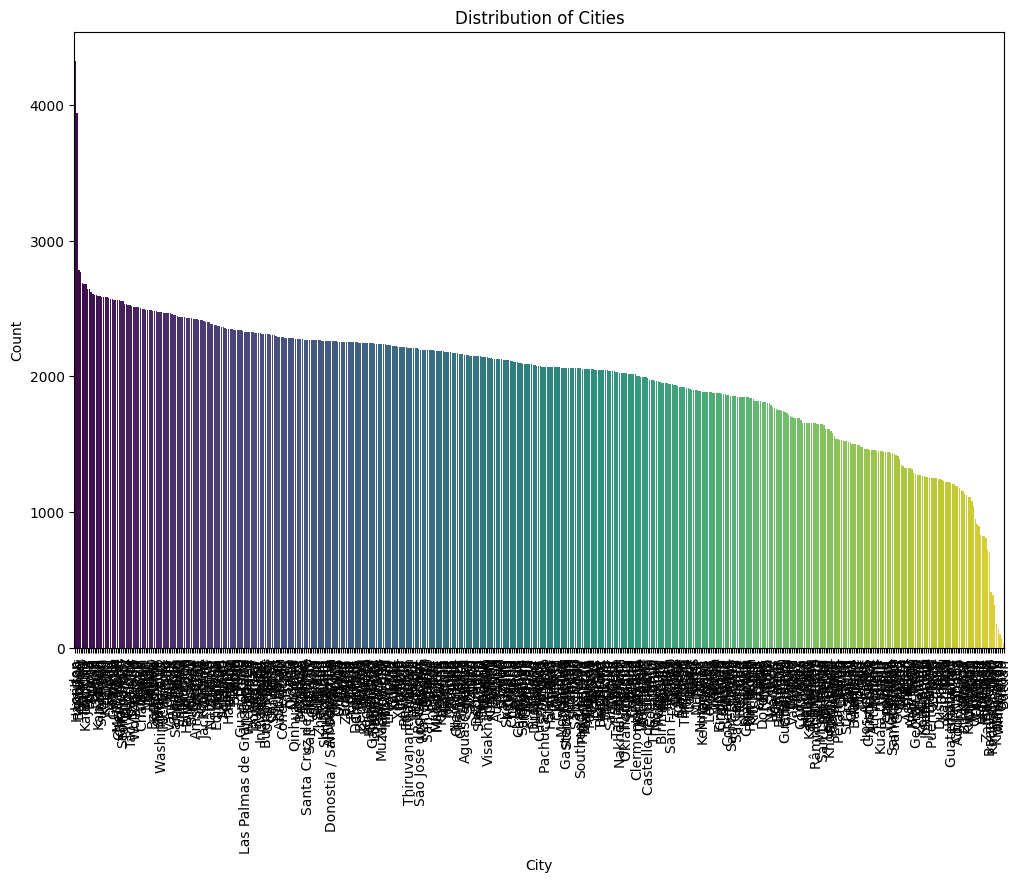

In [10]:
# Univariate Analysis: Distribution of cities
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='City', palette='viridis', order=df['City'].value_counts().index)
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


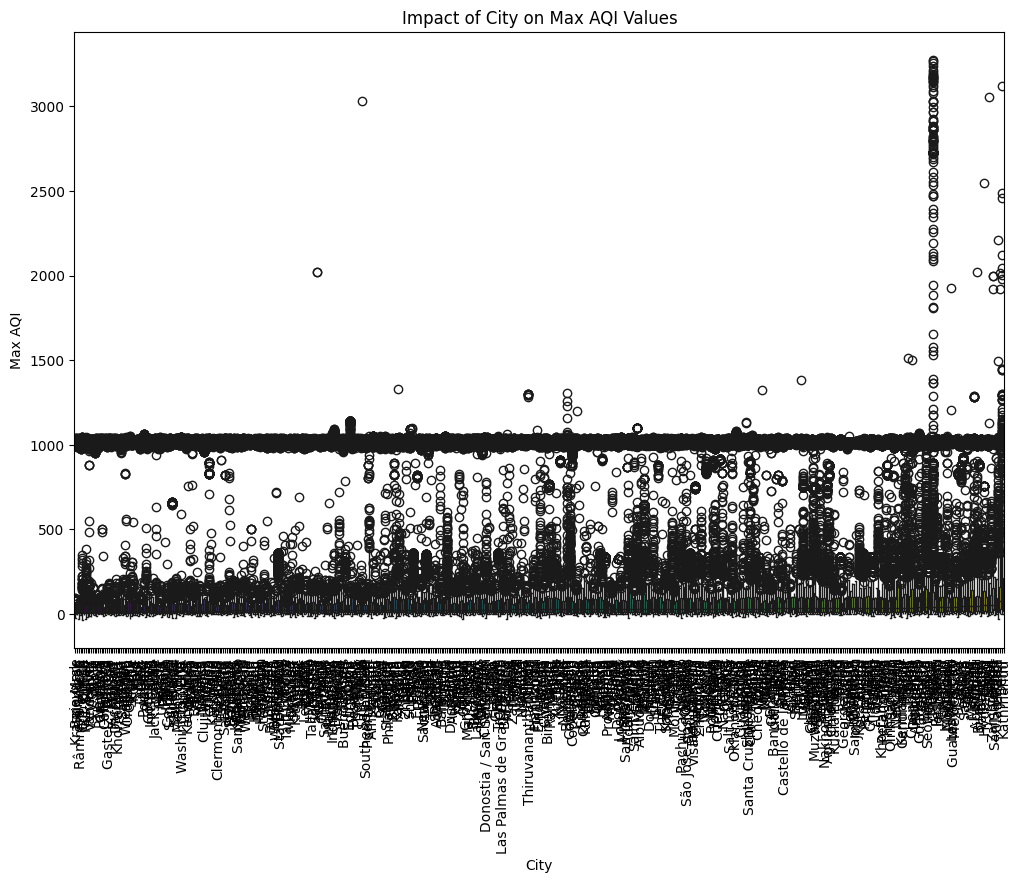

In [11]:
# Bivariate Analysis: Impact of city on AQI values
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='City', y='max', palette='viridis', order=df.groupby('City')['max'].median().sort_values().index)
plt.title('Impact of City on Max AQI Values')
plt.xlabel('City')
plt.ylabel('Max AQI')
plt.xticks(rotation=90)
plt.show()


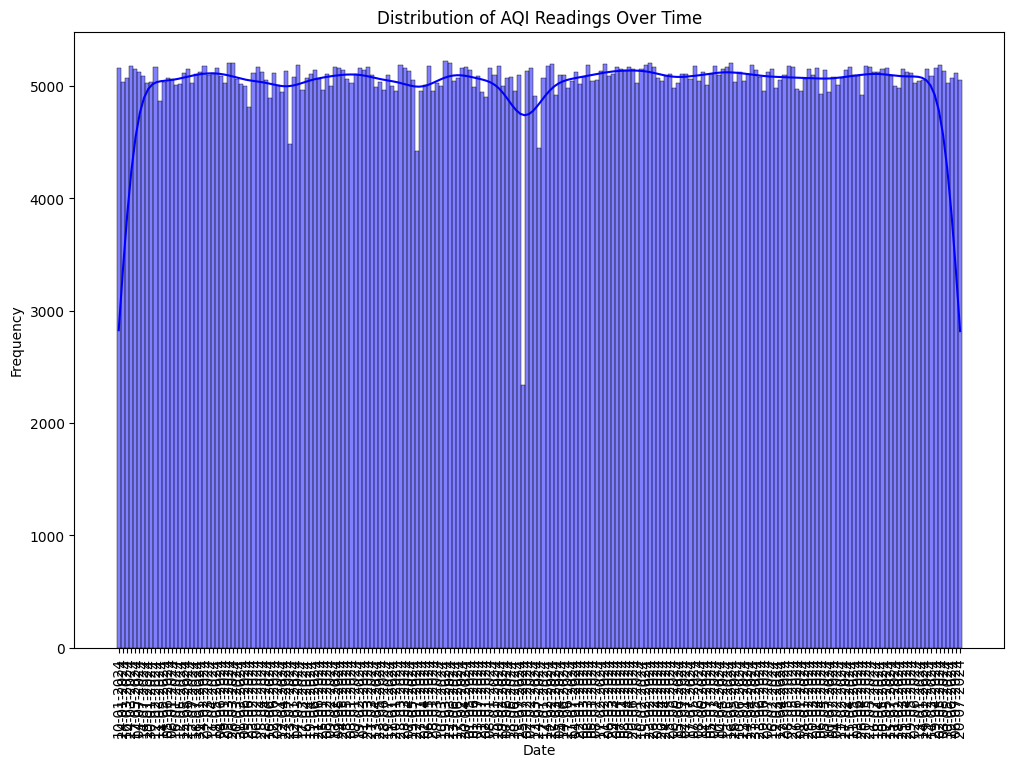

In [13]:
# Univariate Analysis: Distribution of AQI readings over time
plt.figure(figsize=(12, 8))
sns.histplot(df['Date'], kde=True, bins=30, color='blue')
plt.title('Distribution of AQI Readings Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


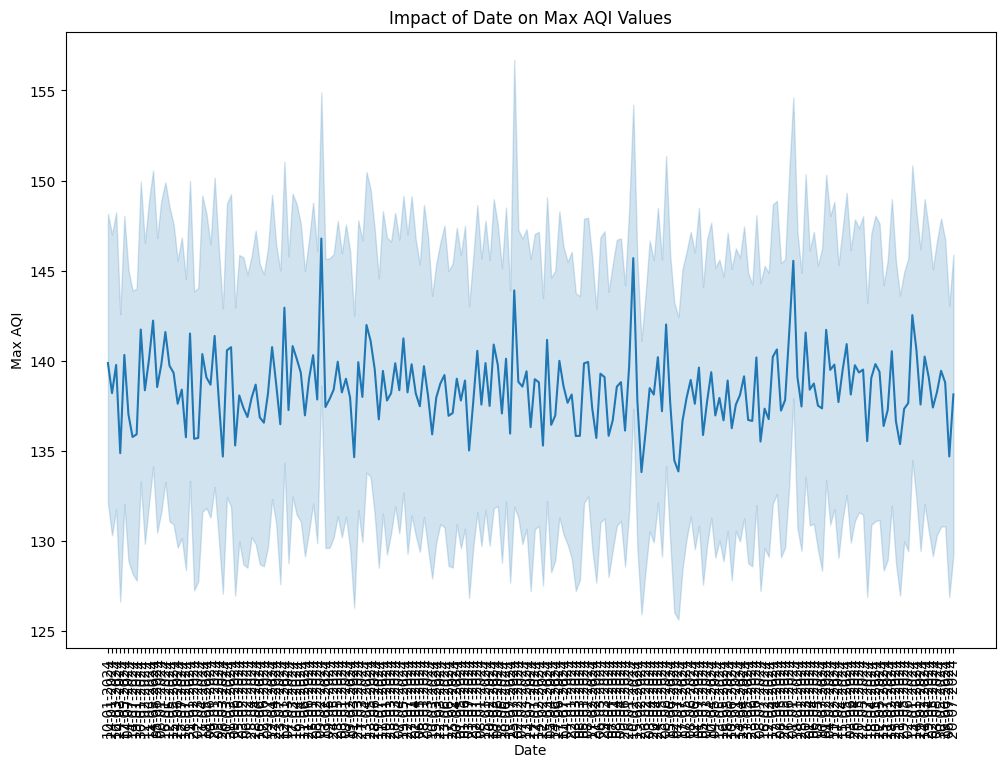

In [14]:
# Bivariate Analysis: Impact of date on AQI values
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Date', y='max', palette='viridis')
plt.title('Impact of Date on Max AQI Values')
plt.xlabel('Date')
plt.ylabel('Max AQI')
plt.xticks(rotation=90)
plt.show()


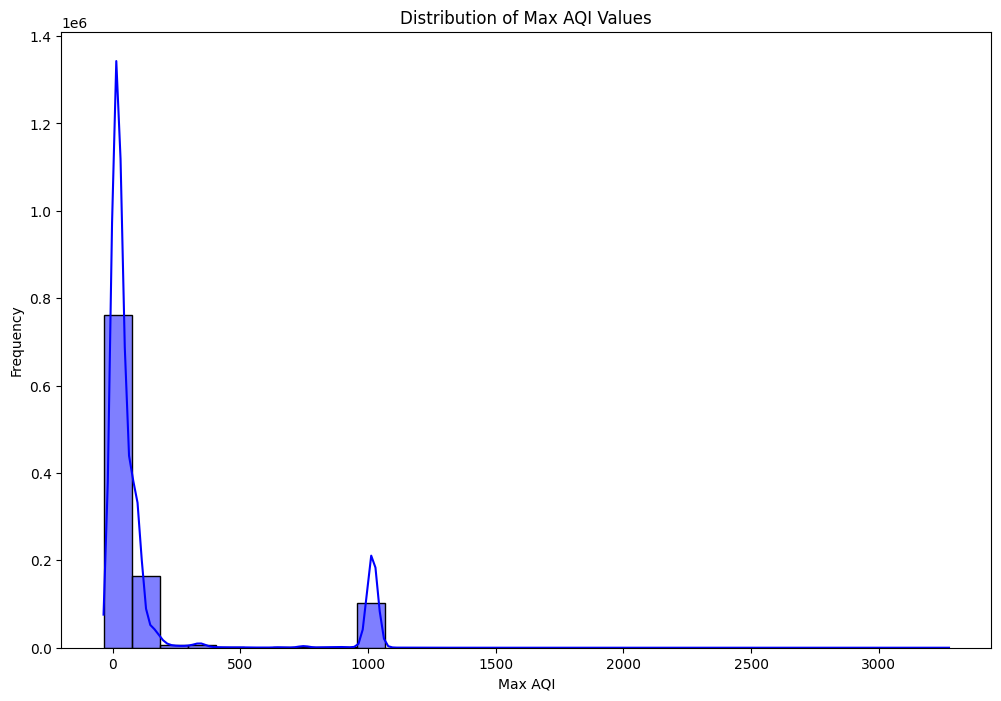

In [15]:
# Univariate Analysis: Distribution of max AQI values
plt.figure(figsize=(12, 8))
sns.histplot(df['max'], kde=True, bins=30, color='blue')
plt.title('Distribution of Max AQI Values')
plt.xlabel('Max AQI')
plt.ylabel('Frequency')
plt.show()


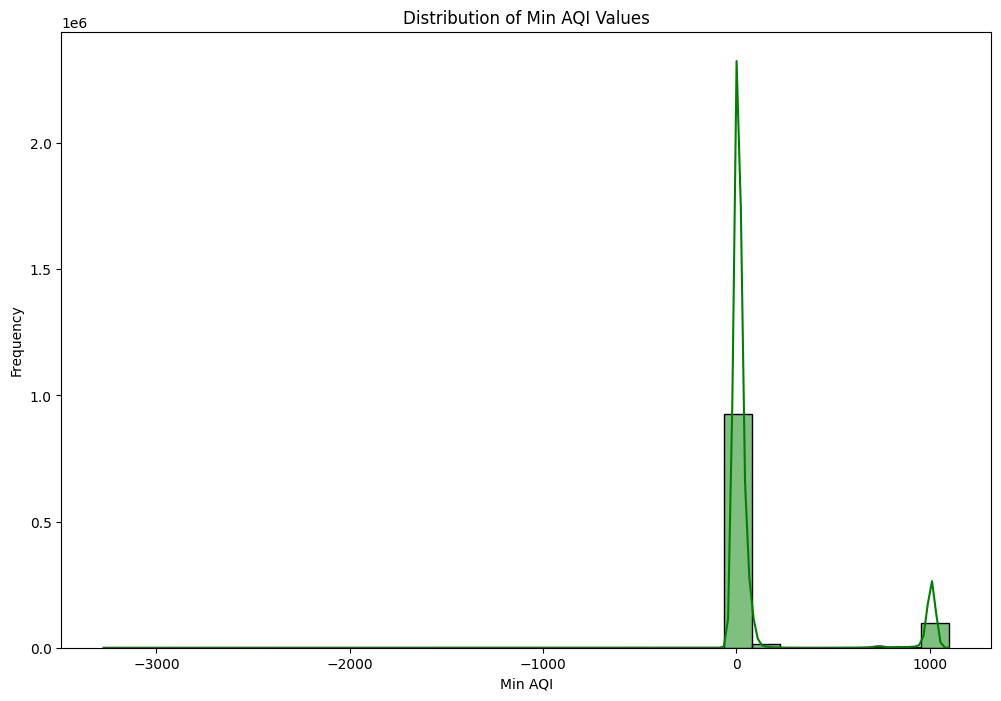

In [16]:
# Univariate Analysis: Distribution of min AQI values
plt.figure(figsize=(12, 8))
sns.histplot(df['min'], kde=True, bins=30, color='green')
plt.title('Distribution of Min AQI Values')
plt.xlabel('Min AQI')
plt.ylabel('Frequency')
plt.show()

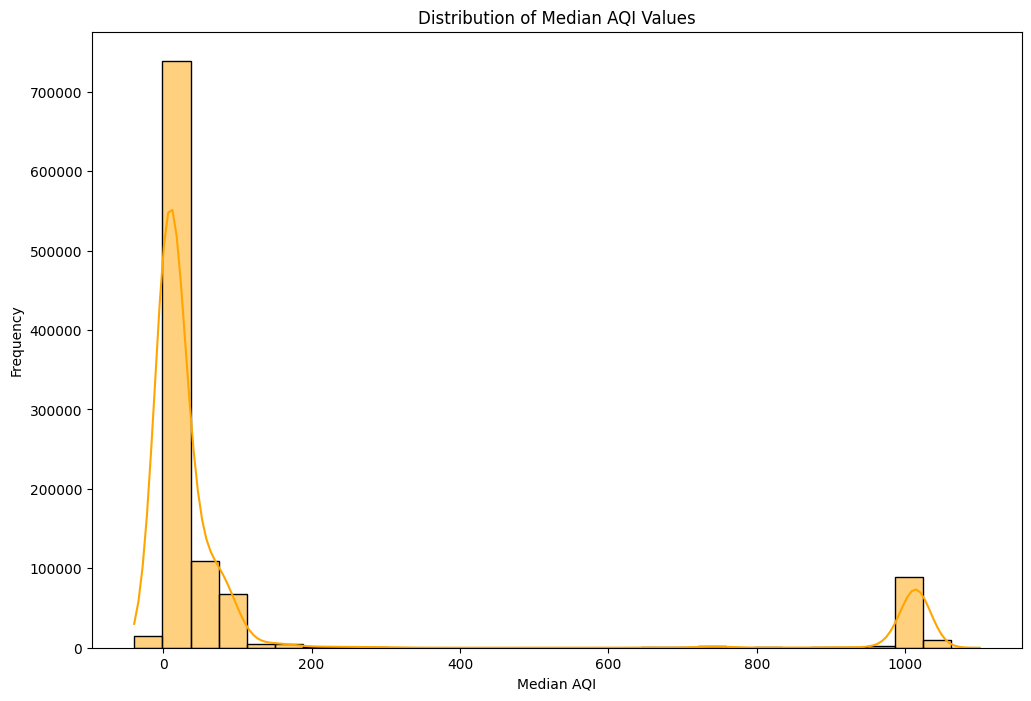

In [17]:
# Univariate Analysis: Distribution of median AQI values
plt.figure(figsize=(12, 8))
sns.histplot(df['median'], kde=True, bins=30, color='orange')
plt.title('Distribution of Median AQI Values')
plt.xlabel('Median AQI')
plt.ylabel('Frequency')
plt.show()


# 4.4.6 Checking Outliers

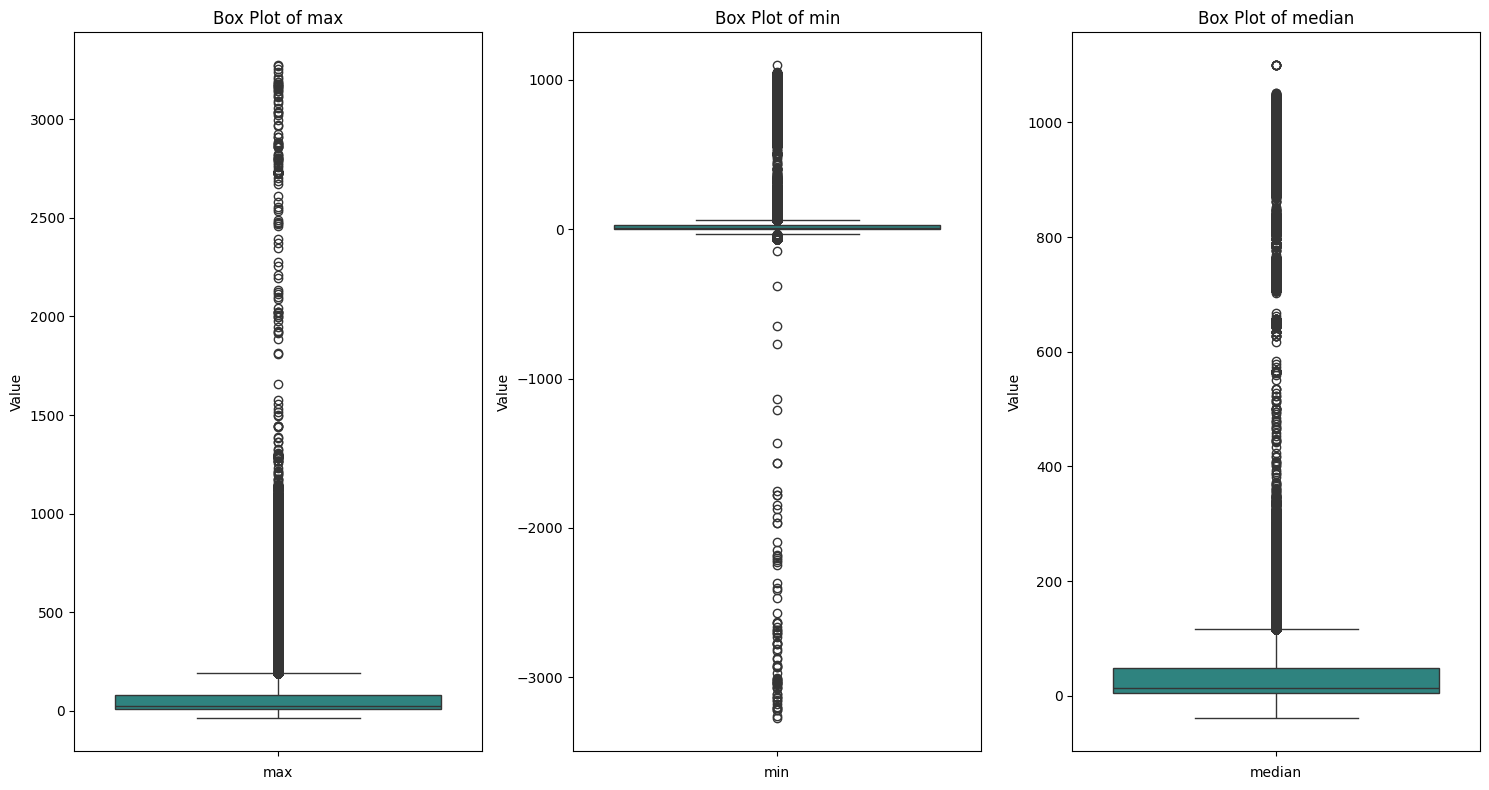

In [21]:
# List of numerical columns to check for outliers
numerical_columns = ['max', 'min', 'median']

# Plot box plots for each numerical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col, palette='viridis')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


# 4.4.7 Multivariate Analysis using PairPlot

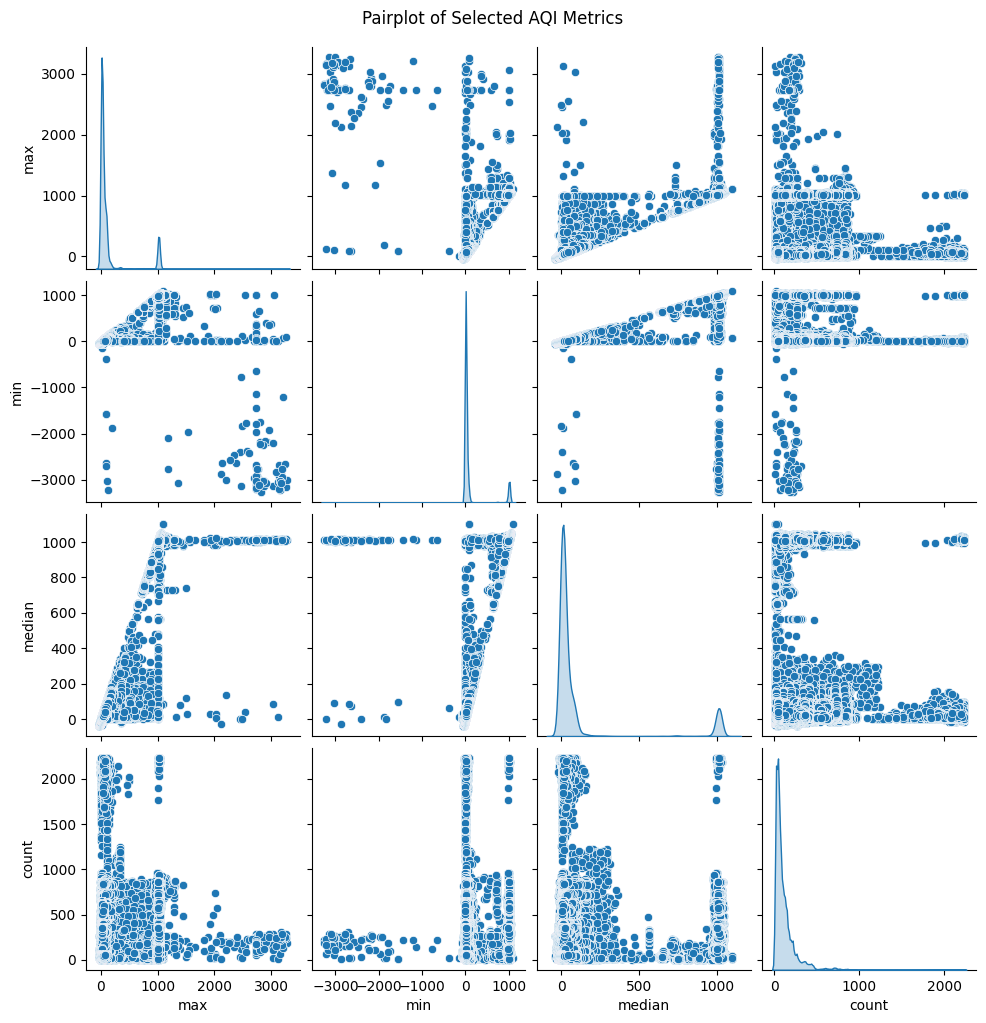

In [22]:
selected_columns = ['max', 'min', 'median', 'count']

# Plotting pairplot
sns.pairplot(df[selected_columns], diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Selected AQI Metrics', y=1.02)
plt.show()